# Home Credit Data Science Bootcamp - Practice Case 03
This notebook created for Practice Case 03 (Foundation of Data Engineering) at iykra. <br>

The Dataset about spam or not on Youtube Channel. Dataset available at UCI repository. <br> we also like to analyze some tweet about this topic on twitter.

**Author**<br>
Herdis Haerusalam<br>
<br>
**Date**<br>
31 October 2019

In [1]:
# !pip install nltk
# !pip install textblob 
# !pip install tweepy
# !pip install re

In [61]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

from pandas.io.json import json_normalize

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/herdishaerusalam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**SOURCE** :  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python)

# Get your data from any sources including Web, Social Media, Portal, etc. by using either web scraping or API technique

## Step A.1. Getting the authentication credentials

In [5]:
# initialize api instance
consumer_key = 'ipJA9G7XA5wwu0Lslp9DvdjBf'
consumer_secret = 'LayVEHgZ6cicQfb3qAkrdh8cxuf6dMRVIwlNs3Nq4H2Wtq8UsF'
access_token = '815720882492448768-xuPAqcW6CxEioPcI4Wbnln3BNkWnXBn'
access_token_secret = 'pwJ0dRqOfujTbwdjZbpC1Iw9xqMeG3ZcLLlqXurFQcF2W'

#Authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

## Step A.2. Getting a Dataset from twitter

In [6]:
#get tweet 
# tweets = tp.Cursor(api.search,q="#ONEPIECE955",lang="en").items(500)
tweets = tp.Cursor(api.search,q="#Eminem",lang="en").items(500)
result = []
for tweet in  tweets :
    result.append(tweet)

## Step A.3 Extract Tweet to pandas dataframe

In [7]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]

    return df

In [8]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
df.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1189813188751167488,"grey leather base, white &amp; orange accents,...",2019-10-31 07:55:44,0,untoldproof,26,,[]
1,1189811397271674885,#eminem + you’ll always be my hero even tho yo...,2019-10-31 07:48:37,0,TonninaGaukrog7,8,,"[{'text': 'eminem', 'indices': [0, 7]}]"
2,1189810972241866752,SOLE COLLECTION 2006 Charity Nike Air 180 'Sha...,2019-10-31 07:46:56,0,untoldproof,26,,"[{'text': 'Eminem', 'indices': [54, 61]}]"
3,1189809374585327616,RT @1awardsupdates: Updated awards of #Eminem\...,2019-10-31 07:40:35,77,pedrosenna136,239,4425,"[{'text': 'Eminem', 'indices': [38, 45]}]"
4,1189809090404311042,RT @1awardsupdates: Updated awards of #Eminem\...,2019-10-31 07:39:27,77,cherish__k,46,🇯🇵,"[{'text': 'Eminem', 'indices': [38, 45]}]"


In [9]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [10]:
len(dataframe)

214

## Getting dataset from UCI about spam comment at Eminem Youtube

In [12]:
data_youtube = pd.read_csv('Youtube04-Eminem.csv')

In [13]:
data_youtube.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [44]:
data_youtube.shape

(448, 5)

# To the data that you’ve just got, do the pre-processing

## Step B.1. Basic Text Pre-processing 

### 1. Lower casing

In [15]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    rt @yrvun: rap god #eminem https://t.co/di6c5q...
1    how you gonna breastfeed me mom you aint got n...
2    i smoke a fat pound of grass and fall on my as...
3    rt @elementau94: this music game a process, it...
4    @gaytimesmag i'm coming for you #eminem https:...
Name: text, dtype: object

### 2. Punctuation removal

In [16]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,rt yrvun rap god eminem httpstcodi6c5qeksp
1,how you gonna breastfeed me mom you aint got n...
2,i smoke a fat pound of grass and fall on my as...
3,rt elementau94 this music game a process it ta...
4,gaytimesmag im coming for you eminem httpstco6...


### 3. Stopwords removal

In [17]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0           rt yrvun rap god eminem httpstcodi6c5qeksp
1            gonna breastfeed mom aint got tits eminem
2    smoke fat pound grass fall ass faster fat bitc...
3    rt elementau94 music game process takes time m...
4      gaytimesmag im coming eminem httpstco6t9t2jdmwm
5    eminems daughter hailie nails arianagrande hal...
6    marshallmathers watched wanted get eminem http...
7    new track featuring eminem released november 1...
8    grey leather base white amp orange accents sub...
9    rt new1027 see eminems daughter dressed ariana...
Name: text, dtype: object

### 4. Frequent words removal

In [18]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

eminem          172
rt               72
eminems          26
daughter         17
arianagrande     16
new              16
music            15
hiphop           15
halloween        13
gay              12
dtype: int64

In [19]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0                     yrvun rap god httpstcodi6c5qeksp
1                   gonna breastfeed mom aint got tits
2    smoke fat pound grass fall ass faster fat bitc...
3    elementau94 game process takes time make moves...
4             gaytimesmag im coming httpstco6t9t2jdmwm
Name: text, dtype: object

### 5. Rare words removal

In [20]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

fkers                 1
raise                 1
httpstcovcyf6l78ce    1
httpstcobpsedy7mgz    1
header                1
kamik                 1
decade                1
ppl                   1
cute                  1
childhoodcrush        1
dtype: int64

In [21]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0                     yrvun rap god httpstcodi6c5qeksp
1                   gonna breastfeed mom aint got tits
2    smoke fat pound grass fall ass faster fat bitc...
3    elementau94 game process takes time make moves...
4             gaytimesmag im coming httpstco6t9t2jdmwm
Name: text, dtype: object

### 6. Spelling correction

In [22]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                       run ran god httpstcodi6c5qeksp
1                      donna breasted mon aunt got its
2    smoke fat pound grass fall ass faster fat bitc...
3    elementau94 game process takes time make moves...
4             gaytimesmag in coming httpstco6t9t2jdmwm
Name: text, dtype: object

### 7. Tokenization

In [23]:
TextBlob(dataframe['text'][1]).words

WordList(['gon', 'na', 'breastfeed', 'mom', 'aint', 'got', 'tits'])

### 8. Stemming

In [24]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [25]:
dataframe.head()

,text
0,yrvun rap god httpstcodi6c5qeksp
1,gonna breastfe mom aint got tit
2,smoke fat pound grass fall ass faster fat bitc...
3,elementau94 game process take time make move p...
4,gaytimesmag im come httpstco6t9t2jdmwm


### 9. Lematization

In [26]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0                     yrvun rap god httpstcodi6c5qeksp
1                      gonna breastfe mom aint got tit
2    smoke fat pound grass fall as faster fat bitch...
3    elementau94 game process take time make move p...
4               gaytimesmag im come httpstco6t9t2jdmwm
Name: text, dtype: object

In [27]:
dataframe.head()

,text
0,yrvun rap god httpstcodi6c5qeksp
1,gonna breastfe mom aint got tit
2,smoke fat pound grass fall as faster fat bitch...
3,elementau94 game process take time make move p...
4,gaytimesmag im come httpstco6t9t2jdmwm


## Step C.1. Basic feature extraction 

### 1. Number of words

In [28]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,yrvun rap god httpstcodi6c5qeksp,4
1,gonna breastfe mom aint got tit,6
2,smoke fat pound grass fall as faster fat bitch...,12
3,elementau94 game process take time make move p...,12
4,gaytimesmag im come httpstco6t9t2jdmwm,4


### 2. Number of characters

In [29]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,yrvun rap god httpstcodi6c5qeksp,4,32
1,gonna breastfe mom aint got tit,6,31
2,smoke fat pound grass fall as faster fat bitch...,12,65
3,elementau94 game process take time make move p...,12,88
4,gaytimesmag im come httpstco6t9t2jdmwm,4,38


### 3. Number of stopwords

In [30]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,yrvun rap god httpstcodi6c5qeksp,4,32,0
1,gonna breastfe mom aint got tit,6,31,0
2,smoke fat pound grass fall as faster fat bitch...,12,65,1
3,elementau94 game process take time make move p...,12,88,0
4,gaytimesmag im come httpstco6t9t2jdmwm,4,38,0


### 3. Number of special characters

In [31]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,yrvun rap god httpstcodi6c5qeksp,4,32,0,0
1,gonna breastfe mom aint got tit,6,31,0,0
2,smoke fat pound grass fall as faster fat bitch...,12,65,1,0
3,elementau94 game process take time make move p...,12,88,0,0
4,gaytimesmag im come httpstco6t9t2jdmwm,4,38,0,0


## Labeling Using Polarity (Textblob)

### 1. New Dataframe

In [32]:
#new df after removed duplicate text
new_df = dataframe
new_df.head()

#sentiment labeling 
text = new_df.text

### 2. Labeling 

In [33]:
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [34]:
new_df = new_df[['text','sentiment','sentimentclass']]

In [35]:
new_df

,text,sentiment,sentimentclass
0,yrvun rap god httpstcodi6c5qeksp,0.000000,Netral
1,gonna breastfe mom aint got tit,0.000000,Netral
2,smoke fat pound grass fall as faster fat bitch...,0.200000,Positive
3,elementau94 game process take time make move p...,-0.400000,Negative
4,gaytimesmag im come httpstco6t9t2jdmwm,0.000000,Netral
5,haili nail costum httpstcovdsqm2s6pz,0.000000,Netral
6,marshallmath watch want get httpstcoe1iwfzq0ob,0.000000,Netral
7,track featur releas novemb 12th bizarresworld ...,0.000000,Netral
8,grey leather base white amp orang accent subtl...,-0.283333,Negative
9,new1027 see dress year httpstco6cqpjb7qyp,0.000000,Netral


### 3. Aggregation Sentimentclass

In [36]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,150,0.700935
1,Negative,18,0.084112
2,Positive,46,0.214953


# Create the model and do the calculation to get your desired output of the data

In [50]:
dataframe.head()

,text,word_count,char_count,stopwords,hastags,sentiment,sentimentclass
0,yrvun rap god httpstcodi6c5qeksp,4,32,0,0,0.0,Netral
1,gonna breastfe mom aint got tit,6,31,0,0,0.0,Netral
2,smoke fat pound grass fall as faster fat bitch...,12,65,1,0,0.2,Positive
3,elementau94 game process take time make move p...,12,88,0,0,-0.4,Negative
4,gaytimesmag im come httpstco6t9t2jdmwm,4,38,0,0,0.0,Netral


In [53]:
#define positive and negative
positive = dataframe.loc[dataframe['sentimentclass'] == "Positive"]
negative = dataframe.loc[dataframe['sentimentclass'] == "Negative"]

In [57]:
#merge all the happy comments into one paragraph
all_text_positive = "".join(positive.text.values)
all_text_negative = "".join(negative.text.values)

In [59]:

#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

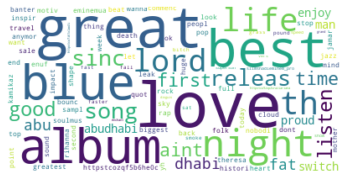

In [62]:
#positive
create_word_cloud(all_text_positive)

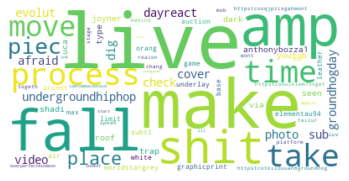

In [63]:
#negative
create_word_cloud(all_text_negative)

## Count Vectorize

In [65]:
count_vectorizer = CountVectorizer(stop_words='english')

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

## TF-IDF vectorizer 

In [66]:
tfidf = TfidfVectorizer(stop_words='english')

In [67]:
X = dataframe['text']
y = dataframe['sentimentclass']

## Train Test Spliting

In [68]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [69]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

## Machine Leaning Modelling

### Logistic Regression

In [70]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [71]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

### Naive Bayes

In [72]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [73]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

### Model Evaluation

#### logistic Regression

In [74]:
# using count vectorizer
print("______________ Countvectorizer ______________")

# Lr_clf_vec_report_train = classification_report(train_y, Lr_pred_vect_train)
# Lr_clf_vec_report_test = classification_report(test_y, Lr_pred_vect_test)

# Lr_confmatrix_vect_train = confusion_matrix(train_y, Lr_pred_vect_train) 
# Lr_confmatrix_vect_test = confusion_matrix(test_y, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
# print('Confusion matrix for Train :')
# print(Lr_confmatrix_vect_train,'\n')
# print('Confusion matrix for Test :')
# print(Lr_confmatrix_vect_test,'\n')
# print('Classification Refort for Train :')
# print(Lr_clf_vec_report_train,'\n')
# print('Classification Refort for Test :')
# print(Lr_clf_vec_report_test,'\n')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 98.83% & 88.37%
Precision train & test  : 98.83% & 88.37%
F1 Score train & test   : 98.83% & 88.37%


In [75]:
# using count vectorizer
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 69.59% & 81.40%
Precision train & test  : 69.59% & 81.40%
F1 Score train & test   : 69.59% & 88.37%


#### Naive Bayes

In [76]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 100.00% & 69.77%
Precision train & test  : 100.00% & 69.77%
F1 Score train & test   : 100.00% & 69.77%


In [77]:
# using count vectorizer
print("______________ TF-IDF ______________")


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 84.80% & 83.72%
Precision train & test  : 84.80% & 83.72%
F1 Score train & test   : 84.80% & 69.77%


### 4. Visualization About Eminem Tweet

#### 4.1. Barchart

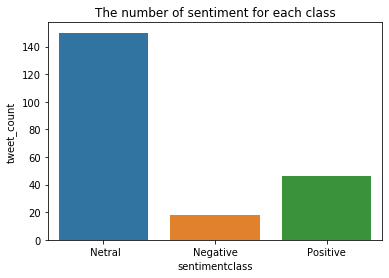

In [37]:
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

#### 4.2. Pie Chart

(-1.117221151010436,
 1.103401397704803,
 -1.1123773067336928,
 1.1376236355508893)

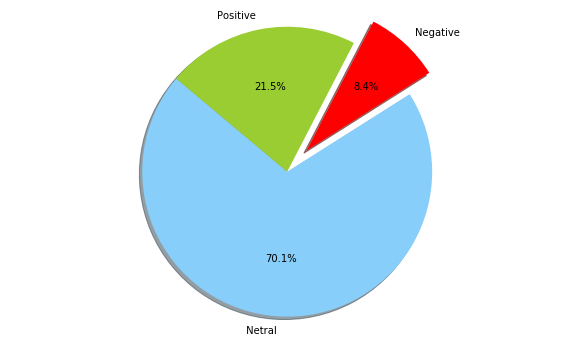

In [38]:
colors = [ 'lightskyblue','red','yellowgreen']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')